**Installation of tensorflow GPU**

In [ ]:
import tensorflow as tf
import numpy as np

In [ ]:
import os 
dataset_dir = r"F:\Study\PGDAIML\Project-10\NewDataSet"
#os.rmdir('/content/drive/MyDrive/Diploma in AIML UOH/Project-10/Dataset/image-samples/.ipynb_checkpoints')
class_names = os.listdir(dataset_dir)
image_size = 224
BATCH_SIZE=32

print(class_names)

['001-NormalDriving', '002-TalkingToPhoneLeft', '003-TalkingToPhoneRight', '004-TalkingWithCopassenger', '005-Leanbackandtalk', '006-Drinking', '007-Drowsy', '008-SmartPhone', '009-Dashboardusage']


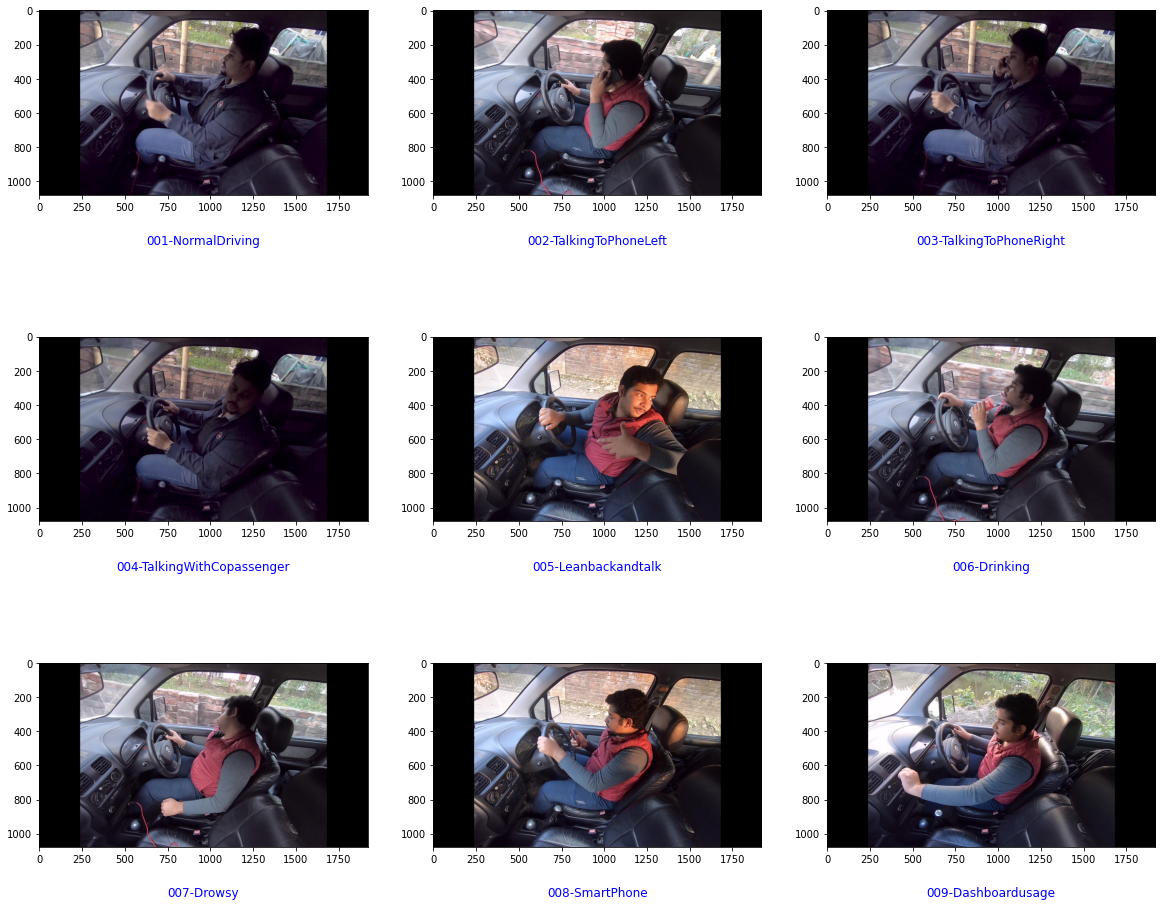

In [ ]:
#display of image 
import os
from IPython.display import Image
import random 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import itertools 


images_list =[]
base_dir = dataset_dir
os.chdir(base_dir)


classes_name = os.listdir(base_dir)

for class_ in classes_name:
  
  images_list.append(  
                      os.path.join(base_dir, class_,
                                     random.choice
                                      (
                                          os.listdir( 
                                                      os.path.join(base_dir,class_) 
                                                    )
                                      )
                                  )            
                      )


fig = plt.figure(figsize=(20,17))

# setting values to rows and column variables
rows = 3
columns = 3
i=1
 
import itertools 
for (class_name, image) in itertools.zip_longest(classes_name,images_list):
  #print(class_name, image)
  img = mpimg.imread(image)
  fig.add_subplot(rows, columns, i)
  plt.imshow(img)
  plt.title(class_name,y= -0.3,color="blue")
  i = i+1



# Image Distribution 

['001-NormalDriving', '002-TalkingToPhoneLeft', '003-TalkingToPhoneRight', '004-TalkingWithCopassenger', '005-Leanbackandtalk', '006-Drinking', '007-Drowsy', '008-SmartPhone', '009-Dashboardusage']
{'001-NormalDriving': 3263, '002-TalkingToPhoneLeft': 1538, '003-TalkingToPhoneRight': 978, '004-TalkingWithCopassenger': 1500, '005-Leanbackandtalk': 1671, '006-Drinking': 1563, '007-Drowsy': 1756, '008-SmartPhone': 1671, '009-Dashboardusage': 683}


<Figure size 432x288 with 0 Axes>

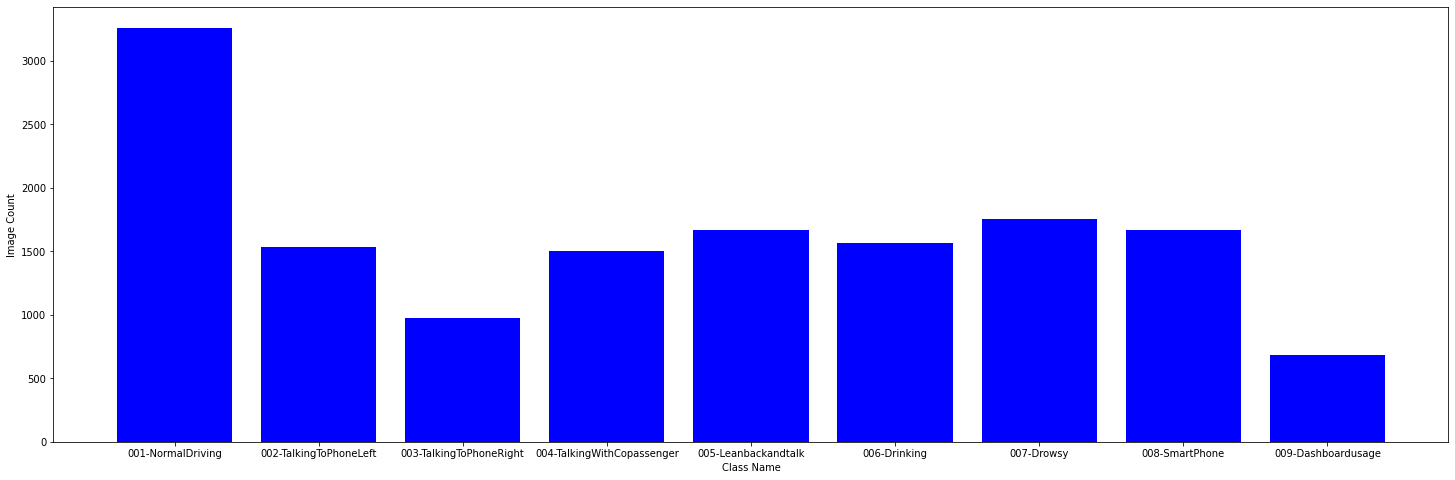

In [ ]:
data_distribution = {}
print(class_names)
for directies_name in class_names:
    directry_path = os.path.join(base_dir,directies_name)
    file_count = len(os.listdir(directry_path))
    data_distribution[directies_name] = file_count
    
print (data_distribution)
xAxis = [key for key, value in data_distribution.items()]
yAxis = [value for key, value in data_distribution.items()]



## BAR GRAPH ##
fig = plt.figure()
plt.figure(figsize=(25,8))
plt.bar(xAxis,yAxis, color='blue')
plt.xlabel('Class Name')
plt.ylabel('Image Count')

plt.show()

In [ ]:
#pre=processing
train_datagen=tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.1
    )

test_datagen=tf.keras.preprocessing.image.ImageDataGenerator(
     rescale=1./255,
     validation_split=0.1
)

train_datagen=train_datagen.flow_from_directory(
    dataset_dir,
    target_size=(image_size,image_size),
    batch_size=BATCH_SIZE,
    subset='training'
)

test_datagen=test_datagen.flow_from_directory(
    dataset_dir,
    target_size=(image_size,image_size),
    batch_size=BATCH_SIZE,
    subset='validation'
)


Found 13164 images belonging to 9 classes.
Found 1459 images belonging to 9 classes.


In [ ]:
model = tf.keras.models.Sequential([
   
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(9, activation='softmax')
])


""" 
cnn=tf.keras.Sequential()

cnn.add(tf.keras.layers.Conv2D(filters=64,padding='same',strides=2,kernel_size=3,activation='relu',input_shape=(224,224,3)))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))


cnn.add(tf.keras.layers.Conv2D(filters=64,padding='same',strides=2,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))


cnn.add(tf.keras.layers.Flatten())
tf.keras.layers.Dropout(0.5)
cnn.add(tf.keras.layers.Dense(9,activation='softmax'))

"""

" \ncnn=tf.keras.Sequential()\n\ncnn.add(tf.keras.layers.Conv2D(filters=64,padding='same',strides=2,kernel_size=3,activation='relu',input_shape=(224,224,3)))\ncnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))\n\n\ncnn.add(tf.keras.layers.Conv2D(filters=64,padding='same',strides=2,kernel_size=3,activation='relu'))\ncnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))\n\n\ncnn.add(tf.keras.layers.Flatten())\ntf.keras.layers.Dropout(0.5)\ncnn.add(tf.keras.layers.Dense(9,activation='softmax'))\n\n"

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(train_datagen,epochs=25,validation_data=test_datagen)

Epoch 1/25
412/412 [==============================] - 1114s 3s/step - loss: 0.9494 - accuracy: 0.6733 - val_loss: 0.8327 - val_accuracy: 0.8314
Epoch 2/25
412/412 [==============================] - 489s 1s/step - loss: 0.2627 - accuracy: 0.9086 - val_loss: 0.8326 - val_accuracy: 0.7910
Epoch 3/25
412/412 [==============================] - 465s 1s/step - loss: 0.1717 - accuracy: 0.9341 - val_loss: 0.6762 - val_accuracy: 0.8533
Epoch 4/25
412/412 [==============================] - 466s 1s/step - loss: 0.1333 - accuracy: 0.9455 - val_loss: 0.7849 - val_accuracy: 0.8622
Epoch 5/25
412/412 [==============================] - 462s 1s/step - loss: 0.1193 - accuracy: 0.9463 - val_loss: 0.7840 - val_accuracy: 0.8663
Epoch 6/25
412/412 [==============================] - 476s 1s/step - loss: 0.1043 - accuracy: 0.9509 - val_loss: 0.9854 - val_accuracy: 0.8698
Epoch 7/25
412/412 [==============================] - 464s 1s/step - loss: 0.1000 - accuracy: 0.9502 - val_loss: 0.8962 - val_accuracy: 0.887

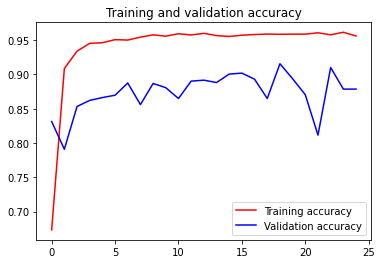

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

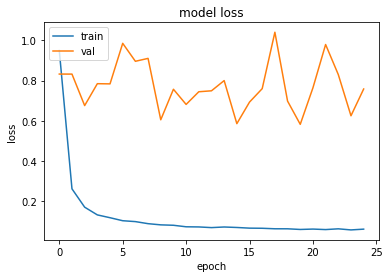

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 64)      1792      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 111, 111, 64)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 109, 109, 64)      36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 26, 26, 128)     

In [ ]:
model.summary()
model.save("F:\Study\PGDAIML\Project-10\phase-4-CNN-NewimageMixedImage-23-01-22.h5")

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 64)      1792      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 111, 111, 64)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 109, 109, 64)      36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 26, 26, 128)     

In [ ]:
test_path = r"F:\Study\PGDAIML\Project-10\Latest_data_set\NewDataSet-Cropped-B&W -Light -Test"

test_classes = os.listdir(test_path)


actual_class_level = []
predicted_class_level = []

def prdict_classlable(image_path):
    
    image_pred = image.load_img(image_path,target_size=(224,224), grayscale=True)
    image_pred = image.img_to_array(image_pred)
    image_pred = np.expand_dims(image_pred,axis=0)
    
    return classes_name[np.argmax(model.predict(image_pred))]


for eachlass in test_classes:

    class_path = os.path.join(test_path,eachlass)
    samples_perclass = os.listdir(class_path)
    
    for each_sample in samples_perclass:
        sample_file_path = os.path.join(class_path,each_sample)
        
        actual_class_level.append(eachlass)
        predicted_class_level.append(prdict_classlable(sample_file_path))
    
    

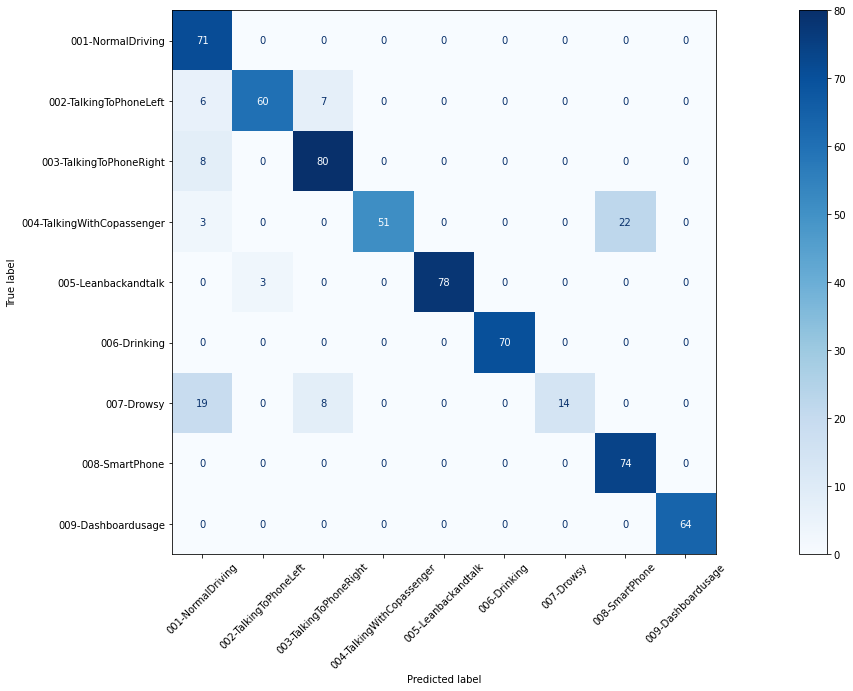

In [3]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np


cm = confusion_matrix(actual_class_level, predicted_class_level)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
plt.rcParams["figure.figsize"] = (30, 10)
disp.plot(cmap=plt.cm.Blues)
plt.show()